In [1]:
from __future__ import print_function

import os, sys
import numpy as np
import scipy as sp
from numpy import sin, cos, exp, log, log10, pi, absolute, power, sqrt
from numpy.polynomial import chebyshev as T
from numpy.polynomial import hermite_e as H
from scipy.integrate import quad
from scipy.misc import factorial
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from spectral_tools import Decompose, ModalD, NodalD, Vandermonde
from edgedetect import ChebEdgeIII, ConfigurePlots, Enhance, LocateEdges, MinMod
from mollification import PiecewiseMollify

In [28]:
N = 128
x = np.linspace(-1.0, 1.0, 2001)
c2s, s2c = Vandermonde(N)
modalD = ModalD(c2s)

In [29]:
step_loc1 = -0.001
width1 = 1.0
chi1 = lambda x: 1.0 if (x>=step_loc1 and x<=(step_loc1+width1)) else 0
a_n1 = Decompose(chi1, c2s)
I_N1 = T.chebval(x, a_n1)
c_j1 = LocateEdges(a_n1, x, modalD)
chi1_x = np.frompyfunc(chi1, 1, 1)(x)

/Users/asiamacbook/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [30]:
print(c_j1)

[-0.01249537  0.9989696 ]


In [33]:
theta = 1./4.
mollified1, mollified1_err = PiecewiseMollify(theta, c_j1, a_n1, x)

/Users/asiamacbook/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


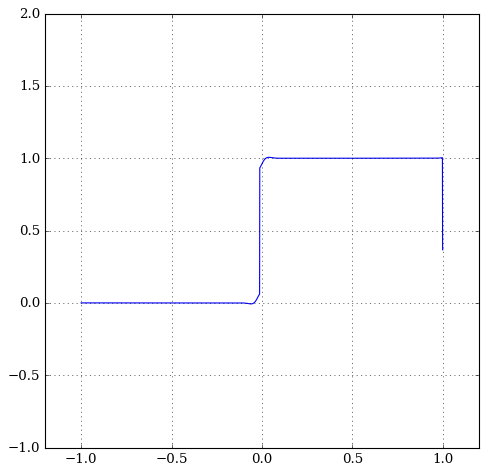

In [35]:
ConfigurePlots()
plt.xlim(-1.2, 1.2)
plt.plot(x, mollified1, label='mollified')